# Text Visualizations

Text visualizations can be used when the textual content needs to be highlighted. For example, a football match's participants can be displayed as a visualization to group them based on what they are - a team, a stadium, a coach or a player.

In [1]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import numpy as np
import os
import pandas as pd
import sys

The running example will be the line-ups of two football matches. They are text-intensive and difficul to represent otherwise. At the same time, a text visualization can add to the interpretability of simply writing out the line-ups, as shown further down.

In [2]:
"""
The first team - the home team.
"""

data = {
    'team':        [ 'Watford' ],
    'coach':       [ 'Quique Sánchez Flores' ],
    'stadium':     [ 'Vicarage Road' ],
    'player':      [ [ "Ben Foster", "Kiko Femenia", "Craig Dawson", "Christian Kabasele", "Jose Holebas", "Abdoulaye Doucoure", "Etienne Capoue", "Will Hughes", "Tom Cleverley", "Gerard Deulofeu", "Andre Gray" ] ],
    'substitute': [ [ "Heurelho Gomes", "Daryl Janmaat", "Adrian Mariappa", "Nathaniel Chalobah", "Ismaila Sarr", "Dimitri Foulquier", "Roberto Pereyra" ]  ]
}

home_df = pd.DataFrame.from_dict(data, orient='index').transpose()

"""
Convert the player list into multiple columns.
"""
player_df = home_df.player.apply(pd.Series)
player_df.columns = ['player'] * len(data['player'][0])
home_df.drop(['player'], axis=1, inplace=True) # drop the original player column

"""
Convert the substitute list into multiple columns.
"""
substitute_df = home_df.substitute.apply(pd.Series)
substitute_df.columns = ['substitute'] * len(data['substitute'][0])
home_df.drop(['substitute'], axis=1, inplace=True) # drop the original substitute column

"""
Merge the player and substitute list into the original dataframe.
"""
home_df = home_df.transpose()
home_df = pd.concat([ home_df, player_df.transpose() ])
home_df = pd.concat([ home_df, substitute_df.transpose() ])
home_df

,0
team,Watford
coach,Quique Sánchez Flores
stadium,Vicarage Road
player,Ben Foster
player,Kiko Femenia
player,Craig Dawson
player,Christian Kabasele
player,Jose Holebas
player,Abdoulaye Doucoure
player,Etienne Capoue


In [3]:
"""
The second team - the away team.
"""

data = {
    'team':       [ 'Arsenal' ],
    'coach':      [ 'Unai Emery' ],
    'stadium':    [  ],
    'player':     [ [ "Bernd Leno", "Ainsley Maitland-Niles", "Sokratis", "David Luiz", "Sead Kolasinac", "Granit Xhaka", "Matteo Guendouzi", "Mesut Ozil", "Dani Ceballos", "Nicolas Pepe", "Pierre-Emerick Aubameyang" ] ],
    'substitute': [ [ "Lucas Torreira", "Calum Chambers", "Reiss Nelson", "Emiliano Martinez", "Joe Willock", "Gabriel Martinelli", "Bukayo Saka" ] ]
}

away_df = pd.DataFrame.from_dict(data, orient='index').transpose()

"""
Convert the player list into multiple columns.
"""
player_df = away_df.player.apply(pd.Series)
player_df.columns = ['player'] * len(data['player'][0])
away_df.drop(['player'], axis=1, inplace=True) # drop the original player column

"""
Convert the substitute list into multiple columns.
"""
substitute_df = away_df.substitute.apply(pd.Series)
substitute_df.columns = ['substitute'] * len(data['substitute'][0])
away_df.drop(['substitute'], axis=1, inplace=True) # drop the original substitute column

"""
Merge the player and substitute list into the original dataframe.
"""
away_df = away_df.transpose()
away_df = pd.concat([ away_df, player_df.transpose() ])
away_df = pd.concat([ away_df, substitute_df.transpose() ])
away_df

,0
team,Arsenal
coach,Unai Emery
stadium,None
player,Bernd Leno
player,Ainsley Maitland-Niles
player,Sokratis
player,David Luiz
player,Sead Kolasinac
player,Granit Xhaka
player,Matteo Guendouzi


In [4]:
"""
The two dataframes are joined together.
The home and away dataframes make up a column each.
The participant type becomes the index.
"""

df = pd.concat([ home_df, away_df ], axis=1)
df.reset_index(inplace=True)
df.columns = [ 'participant', 'home', 'away' ]
df.set_index('participant', inplace=True)
df

,home,away
participant,,
team,Watford,Arsenal
coach,Quique Sánchez Flores,Unai Emery
stadium,Vicarage Road,None
player,Ben Foster,Bernd Leno
player,Kiko Femenia,Ainsley Maitland-Niles
player,Craig Dawson,Sokratis
player,Christian Kabasele,David Luiz
player,Jose Holebas,Sead Kolasinac
player,Abdoulaye Doucoure,Granit Xhaka


In the visualization, special care is paid to ensuring that data is separated well using the proximity Gestalt principle. The different participant groups are separated by a wide white vertical space. The categories are separated by a wide vertical space.

This visualization does not tell a story on its own. However, it can be used similarly to a heatmap by assigning values to different participants. The example uses boolean values to indicate whether a participant was captured or not. In the following example, the home team is assumed to be the minority side - its participants have a lower chance of being picked.

In [13]:
"""
Generate random values for the away team.
"""
values = np.random.choice( [ 0, 0, 1, 1 ], len(home_df))

"""
Add them to a new dataframe.
"""
boolean_home_df = home_df.copy()
boolean_home_df.columns = [ 'name' ]
boolean_home_df['value'] = values
boolean_home_df

,name,value
team,Watford,0
coach,Quique Sánchez Flores,0
stadium,Vicarage Road,0
player,Ben Foster,0
player,Kiko Femenia,0
player,Craig Dawson,1
player,Christian Kabasele,0
player,Jose Holebas,0
player,Abdoulaye Doucoure,0
player,Etienne Capoue,1


In [14]:
"""
Generate random values for the away team.
"""
values = np.random.choice( [ 0, 1, 1, 1 ], len(away_df))

"""
Add them to a new dataframe.
"""
boolean_away_df = away_df.copy()
boolean_away_df.columns = [ 'name' ]
boolean_away_df['value'] = values
boolean_away_df

,name,value
team,Arsenal,0
coach,Unai Emery,1
stadium,None,1
player,Bernd Leno,0
player,Ainsley Maitland-Niles,1
player,Sokratis,0
player,David Luiz,1
player,Sead Kolasinac,0
player,Granit Xhaka,0
player,Matteo Guendouzi,1


In [15]:
"""
The two dataframes are joined together.
The home and away dataframes make up two columns each.
A multi-level index is created to separate them neatly.
The participant type becomes the index.
"""

df = pd.concat([ boolean_home_df, boolean_away_df ], axis=1)
df.reset_index(inplace=True)
columns = [ ('participant', 'participant'), ('home', 'name'), ('home', 'value'), ('away', 'name'), ('away', 'value') ]
df.columns = pd.MultiIndex.from_tuples(columns)
df.set_index(('participant','participant'), inplace=True)
df.index.name = 'participant'
df

home                             away      
                              name value                       name value
participant                                                              
team                       Watford     0                    Arsenal     0
coach        Quique Sánchez Flores     0                 Unai Emery     1
stadium              Vicarage Road     0                       None     1
player                  Ben Foster     0                 Bernd Leno     0
player                Kiko Femenia     0     Ainsley Maitland-Niles     1
player                Craig Dawson     1                   Sokratis     0
player          Christian Kabasele     0                 David Luiz     1
player                Jose Holebas     0             Sead Kolasinac     0
player          Abdoulaye Doucoure     0               Granit Xhaka     0
player              Etienne Capoue     1           Matteo Guendouzi     1
player                 Will Hughes     1                 Mesut Ozil     1
player               Tom Cleverley     0              Dani Ceballos     0
player             Gerard Deulofeu     1               Nicolas Pepe     0
player                  Andre Gray     0  Pierre-Emerick Aubameyang     1
substitute          Heurelho Gomes     1             Lucas Torreira     1
substitute           Daryl Janmaat     0             Calum Chambers     0
substitute         Adrian Mariappa     1               Reiss Nelson     1
substitute      Nathaniel Chalobah     1          Emiliano Martinez     1
substitute            Ismaila Sarr     1                Joe Willock     1
substitute       Dimitri Foulquier     0         Gabriel Martinelli     1
substitute         Roberto Pereyra     0                Bukayo Saka     0

In this case, the difference between the participants does not have to be as pronounced as in the heatmap. Therefore the alpha values can be closer to each other - 0.5-1, not 0.25-1. That way, readability is maintained while the message still comes across. It is still amply clear that most of the away team's players were picked, and that few of the home team's players were picked.

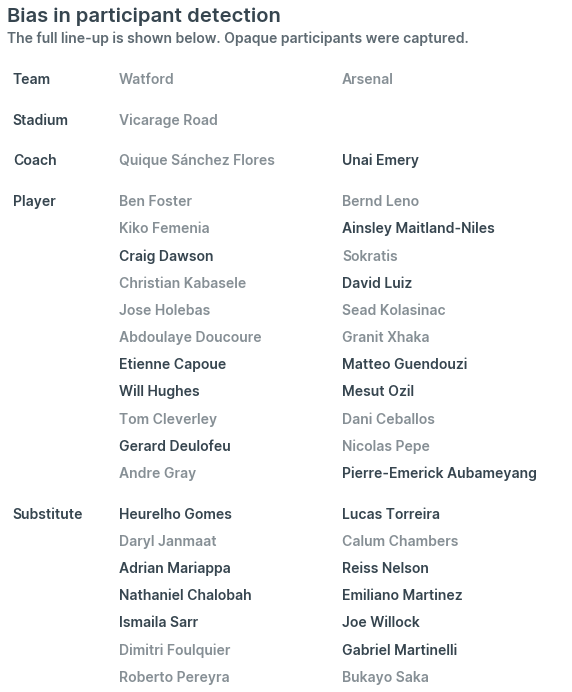

In [74]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,10))

plt.xlim(0, 10)
plt.ylim(0, 10)

"""
Style.
"""
pad = 0.1 # the padding from the left border
row_height = 0.5 # the height of each row

"""
Each group is displayed separately.
"""
plt.gca().invert_yaxis() # invert the y-axis
rows = 0
for group in [ 'team', 'stadium', 'coach', 'player', 'substitute' ]:
    rows += 1 + (row_height if rows > 0 else 0)
    plt.text(pad, rows * row_height, group.capitalize())
    
    """
    Go through each row in the group.
    Then, for each category, print the name of the player.
    """
    categories = {
        ('home', 'name'): ('home', 'value'),
        ('away', 'name'): ('away', 'value'),
    }
    for i, (_, row) in enumerate(df.loc[[group]].iterrows()):
        rows += 1 if i else 0
        for index, (category, value) in enumerate(categories.items()):
            plt.text(2 + index * 4, rows * row_height, row[category],
                     color='C3', alpha=max(row[value], 0.6))

plt.axis('off')
plt.title('Bias in participant detection', loc='left', fontweight='bold', pad=35) # pad to make space for a subtitle
ax = plt.gca()
plt.text(0, 1.02, 'The full line-up is shown below. Opaque participants were captured.',
         alpha=0.8, ha='left', va='bottom', transform=ax.transAxes)
plt.show()

## Annotations

Textual visualizations can also be useful when text needs to be annotated. For example, in Natural Language Processing (NER), many tasks annotate the text for various applications.

In the next example, a simple sentence is tokenized and its named entities are annotated.

In [17]:
import nltk

sentence = "Anthony Lopes is a Portuguese professional footballer who plays for \
Olympique Lyonnais as a goalkeeper."

tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)
entities = [ entity 
            for entity in nltk.ne_chunk(pos_tags, binary=True) ] # we are not interested in the type of named entity

"""
Collect the named entities.
"""
named_entities = []
for entity in entities:
    if type(entity) == nltk.tree.Tree:
        named_entity_tokens = [ pair[0] for pair in entity ]
        named_entities.append(named_entity_tokens)

named_entities

[['Anthony', 'Lopes'], ['Portuguese'], ['Olympique', 'Lyonnais']]

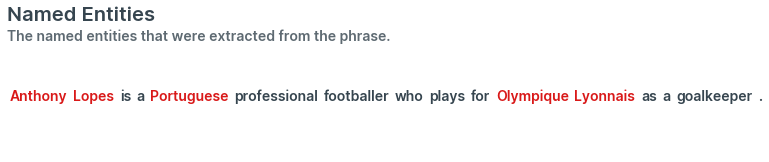

In [70]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

figure = plt.figure(figsize=(5,2))
renderer = figure.canvas.get_renderer()

"""
Style.
"""
word_pad = 0.2 # the padding between words (in pixels)
offset = 0.1
plt.xlim(0, 10)
plt.gca().invert_yaxis() # invert the y-axis
for token in tokens:
    """
    Annotate named entities.
    """
    if any(token in named_entity for named_entity in named_entities):
        text = plt.text(offset, 0.5, token, color='C0',
                        fontweight=600)
    else:
        text = plt.text(offset, 0.5, token, fontweight=600)
        
    """
    Subsequent text components will be offset.
    """
    bb = text.get_window_extent(renderer).inverse_transformed(plt.gca().transData)
    offset = offset + bb.width + word_pad
    
    """
    For underline.
    Note that the figure needs and the x-limit need to extend to cover the rectangle.
    """
#     if any(token in named_entity for named_entity in named_entities):
#         rectangle = plt.Rectangle((bb.x0 - word_pad / 2, bb.y0 + 0.05), bb.width + word_pad, 0.02, facecolor='C0')
#         plt.gca().add_patch(rectangle)

plt.axis('off')
plt.title('Named Entities', loc='left', fontweight='bold', pad=25) # pad to make space for a subtitle
ax = plt.gca()
plt.text(0, 1.02, 'The named entities that were extracted from the phrase.',
         alpha=0.8, ha='left', va='bottom', transform=ax.transAxes)
plt.show()

## Timelines

Timelines can be either single-sided or double-sided. Double-sided timelines are useful in sports events, such as football, to highlight the differences between two teams. This is shown first.

In [38]:
"""
The timeline data is provided as a dataframe.
"""

data = [
    { 'time': 1,  'type': 'game', 'description': 'first half', 'recall': 1, 'side': 0 },
    { 'time': 13, 'type': 'yellow card', 'description': 'Van Dijk', 'recall': 1, 'side': -1 },
    { 'time': 34, 'type': 'goal', 'description': 'Salah (1-0)', 'recall': 1, 'side': -1 },
    { 'time': 40, 'type': 'yellow card', 'description': 'Koulibaly', 'recall': 0, 'side': 1 },
    { 'time': 45, 'type': 'game', 'description': 'half-time', 'recall': 1, 'side': 0 },
    { 'time': 46, 'type': 'game', 'description': 'second half', 'recall': 1, 'side': 0 },
    { 'time': 62, 'type': 'substitution', 'description': 'Zielinski ↑↓ Fabianski', 'recall': 1, 'side': 1 },
    { 'time': 67, 'type': 'substitution', 'description': 'Milik ↑↓ Mertens', 'recall': 1, 'side': 1 },
    { 'time': 70, 'type': 'substitution', 'description': 'Ghoulam ↑↓ Rui', 'recall': 1, 'side': 1 },
    { 'time': 79, 'type': 'substitution', 'description': 'Keita ↑↓ Firmino', 'recall': 0, 'side': -1 },
    { 'time': 83, 'type': 'yellow card', 'description': 'Salah', 'recall': 1, 'side': -1 },
    { 'time': 85, 'type': 'substitution', 'description': 'Fabinho ↑↓ Milner', 'recall': 0, 'side': -1 },
    { 'time': 90, 'type': 'substitution', 'description': 'Lovren ↑↓ Alexander-Arnold', 'recall': 1, 'side': -1 },
    { 'time': 90, 'type': 'yellow card', 'description': 'Robertson', 'recall': 0, 'side': -1 },
    { 'time': 90, 'type': 'yellow card', 'description': 'Mane', 'recall': 0, 'side': -1 },
    { 'time': 90,  'type': 'game', 'description': 'full-time', 'recall': 1, 'side': 0 },
]

timeline_df = pd.DataFrame(data)
timeline_df

,time,type,description,recall,side
0,1,game,first half,1,0
1,13,yellow card,Van Dijk,1,-1
2,34,goal,Salah (1-0),1,-1
3,40,yellow card,Koulibaly,0,1
4,45,game,half-time,1,0
5,46,game,second half,1,0
6,62,substitution,Zielinski ↑↓ Fabianski,1,1
7,67,substitution,Milik ↑↓ Mertens,1,1
8,70,substitution,Ghoulam ↑↓ Rui,1,1
9,79,substitution,Keita ↑↓ Firmino,0,-1


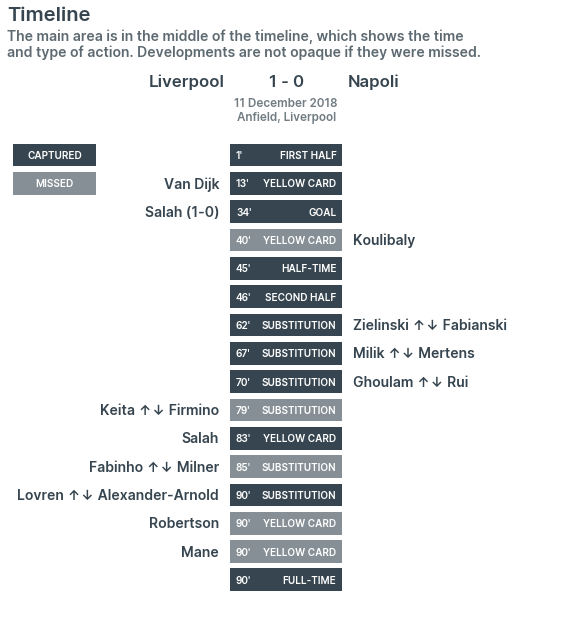

In [67]:
plt.style.use(os.path.join(sys.path[0], "fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,10))

plt.xlim(0, 10)
plt.ylim(0, 24)

"""
Style.
"""
pad = 0.1 # the padding from the left border
row_height = 1.25 # the height of each row
margin_top = 3.75 # the margin from the top

center = 5
center_width = 2
legend_width = 1.5

plt.text(center + center_width/2. + center_width/20., 0.5, 
             "Napoli", ha='left', va='center',
             fontsize='larger', fontweight=800, color='C3')
plt.text(center - center_width/2. - center_width/20., 0.5,
             "Liverpool", ha='right', va='center',
             fontsize='larger', fontweight=800, color='C3')
plt.text(center, 0.5, "1 - 0", ha='center', va='center',
             fontsize='larger', fontweight=800, color='C3')
plt.text(center, 1.75, "11 December 2018\nAnfield, Liverpool", ha='center', va='center',
             fontsize='small', fontweight=800, color='C3', alpha=0.7)

"""
Each group is displayed separately.
"""
plt.gca().invert_yaxis() # invert the y-axis
for i, development in timeline_df.iterrows():
    y = i * row_height + margin_top
    if (development.side < 0):
        plt.text(center-center_width/2. - center_width/10., y, development.description,
                 linespacing=row_height, va='center',
                 fontweight=800, ha='right')
    elif (development.side > 0):
        plt.text(center+center_width/2. + center_width/10., y, development.description,
                 linespacing=row_height, va='center',
                 fontweight=800, ha='left')
    
    background = mpatches.Rectangle(
        (center-center_width/2., y-0.5), 
        center_width, row_height-0.25, facecolor='C3',
        alpha=(1 if development.recall else 0.6)
    )
    plt.gca().add_patch(background)
    
    plt.text(center - center_width/2. + center_width/20., y, 
             str(development.time) + "'",
             linespacing=row_height, ha='left', va='center',
             fontsize=10, fontweight=800, color='white')
    plt.text(center + center_width/2. - center_width/20., y, 
             (development.description.upper() if development.side == 0 else development.type.upper()),
             linespacing=row_height, ha='right', va='center',
             fontsize=10, fontweight=800, color='white')

"""
Add the legend.
"""
background = mpatches.Rectangle(
        (pad, margin_top-0.5), 
        legend_width, row_height-0.25, facecolor='C3'
)
plt.gca().add_patch(background)
    
plt.text(pad + legend_width/2., margin_top, "Captured".upper(),
         linespacing=row_height, ha='center', va='center',
         fontsize=10, fontweight=800, color='white')

background = mpatches.Rectangle(
        (pad, margin_top-0.5 + row_height), 
        legend_width, row_height-0.25, facecolor='C3',
        alpha=0.6
)
plt.gca().add_patch(background)
    
plt.text(pad + legend_width/2., margin_top + row_height, "Missed".upper(),
         linespacing=row_height, ha='center', va='center',
         fontsize=10, fontweight=800, color='white')

"""
Render
"""

plt.axis('off')
plt.title('Timeline', loc='left', fontweight='bold', pad=50) # pad to make space for a subtitle
ax = plt.gca()
plt.text(0, 1.02, 'The main area is in the middle of the timeline, which shows the time \nand type of action. Developments are not opaque if they were missed.',
         alpha=0.8, ha='left', va='bottom', transform=ax.transAxes)
plt.show()